### HYPOTHESIS TESTING
---

### Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

### Reading data

In [3]:
ms = pd.read_csv("../data/microsoft.csv")

### Adding log return

In [ ]:
ms["tomorrow_close"] = ms["Close"].shift(-1)
ms["log_return"] = np.log(ms["tomorrow_close"]) - np.log(ms["Close"])

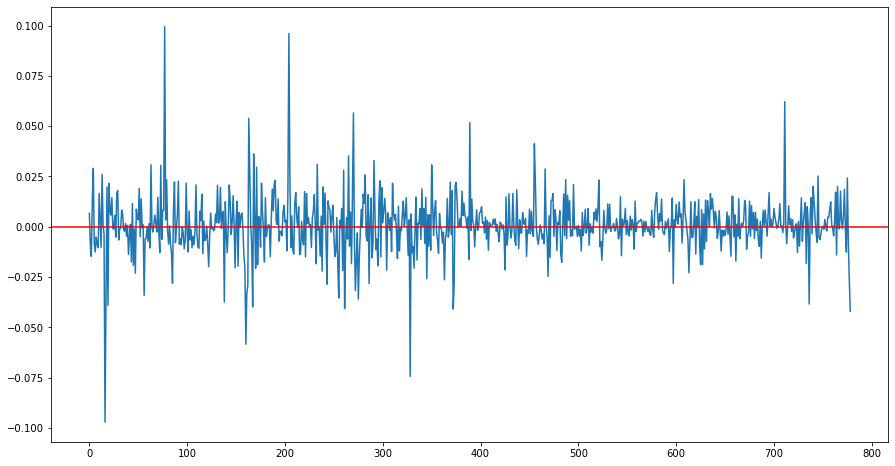

In [7]:
ms["log_return"].plot(figsize=(15, 8))
plt.axhline(0, color="red")
plt.show()

### Hypothesis testing

#### Step 1: set hypothesis

$H_0 : \mu = 0$ 

$H_a : \mu \neq 0$

H0 means the average stock return is 0

H1 means the average stock return is not equal to 0

#### Step 2: calculate test statistic

In [8]:
sample_mean = ms["log_return"].mean()
sample_std = ms["log_return"].std(ddof=1)
n = ms["log_return"].shape[0]

#if sample size (n) is large enough, we can use z-distribution, instead of t-distribution
#mu=0 under the null hypothesis
z_hat = (sample_mean - 0)/(sample_std/n**0.5)
print(z_hat)

1.6141477140003675


#### Step 3: set decision criteria

In [9]:
alpha = 0.05

z_left = norm.ppf(alpha/2, 0, 1)
z_right = -z_left #z-distribution is symmetric
print(z_left, z_right)

-1.9599639845400545 1.9599639845400545


#### Step 4: make decision - shall we reject H0?

In [11]:
print('At significant level of {0}, shall we reject: {1}'
      .format(alpha, z_hat>z_right or z_hat<z_left))

At significant level of 0.05, shall we reject: False


### One tail test

$H_0 : \mu \leq 0$ 

$H_a : \mu > 0$

In [13]:
z_right = norm.ppf(1-alpha, 0, 1)

1.6448536269514722

In [14]:
print('At significant level of {0}, shall we reject: {1}'
      .format(alpha, z_hat>z_right))

At significant level of 0.05, shall we reject: False


### P-value method

In [15]:
p = 1 - norm.cdf(z_hat, 0, 1)
print(p)

0.053247694996968464


In [16]:
print('At significant level of {0}, shall we reject: {1}'
      .format(alpha, p < alpha))

At significant level of 0.05, shall we reject: False
